# Explicit vs implicit formulations for the Dirichlet BC

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

## Explicit Formulation
Using finite difference approximations, we can express the temperature at node $i$ and time step n as $T_i^n$ as follows:

$$ T_i^{n+1} = T_i^n + Fo \, (T_{i+1}^n - 2T_i^n + T_{i-1}^n) $$

where $ Fo = \frac{\alpha \Delta t}{(\Delta x)^2} $. Also known as the Fourier number. The Fourier number must satisfy the stability criterion $ Fo \leq 0.5 $ for the explicit method to be stable. This stability condition is based on the fact that the explicit method computes the temperature at the next time step directly from the current time step, which can lead to numerical instability if the time step is too large relative to the spatial discretization.



```{exercise}
:label: explicit_dirichlet
Implement the explicit finite difference method to solve the 1D transient heat conduction equation with Dirichlet boundary conditions. Consider a rod of length $L$ with the following conditions:
- Initial temperature: $T(x, 0) = T_{init}$
- Boundary conditions: $T(0, t) = T_{L}$ and $T(L, t) = T_{R}$
Material properties and simulation parameters:

- Thermal diffusivity, $\alpha: 1.2 \times 10^{-5} m²/s$
- Length of the rod, $L: 0.1 m$
- Time step, $\Delta t: 0.1 s$
- Spatial step, $\Delta x: 0.01 m$
- Initial temperature, $T_0: 25 °C$
- Left boundary temperature, $T_{L}: 400 °C$
- Right boundary temperature, $T_{R}: 25 °C$
```

In [11]:
# Define material properties and simulation parameters
time_final = 40 # s
alpha = 1.2e-5  # m^2/s
L = 0.1         # m
dt = 3       # s
dx = 0.01       # m
T_init = 25.0   # °C
T_L = 400.0     # °C
T_R = 25.0      # °C
num_node = int(L/dx) + 1
num_ts = int(time_final/dt)    # total time steps
# Calculate Fourier number
r = alpha * dt / dx**2
print("Fourier number (r):", r)

Fourier number (r): 0.36


Let us implement the explicit method:



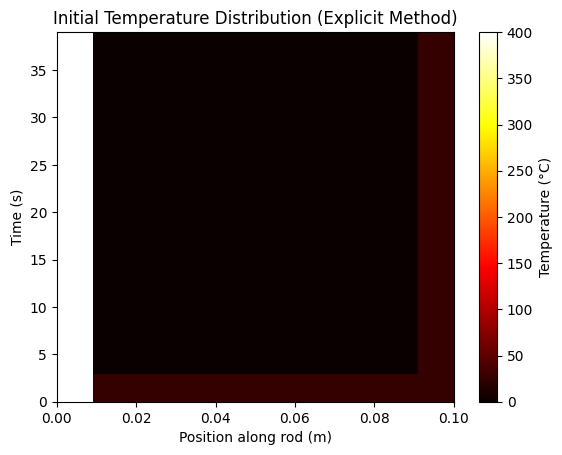

In [12]:
# Initialize temperature array
T_explicit = np.zeros((num_node, num_ts)) # T[i, n] - n is the number of time step, i is the node
# Set initial condition
T_explicit[:, 0] = T_init
# Set boundary conditions
T_explicit[0, :] = T_L
T_explicit[-1, :] = T_R


# Visualize the matrix
plt.imshow((T_explicit.T), aspect='auto', cmap='hot', origin='lower', extent=[0, L, 0, dt*num_ts])
plt.colorbar(label='Temperature (°C)')
plt.ylabel('Time (s)')
plt.xlabel('Position along rod (m)')
plt.title('Initial Temperature Distribution (Explicit Method)')
plt.show()

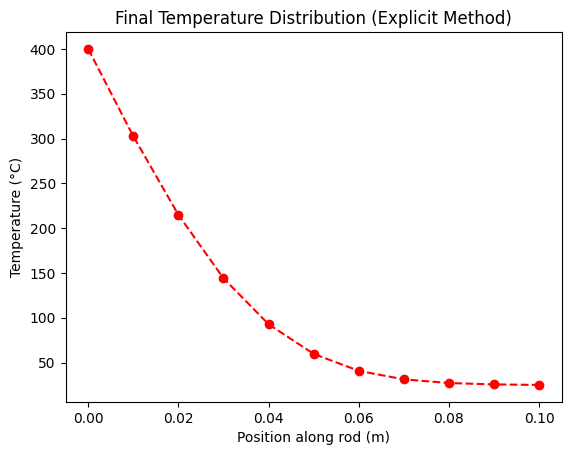

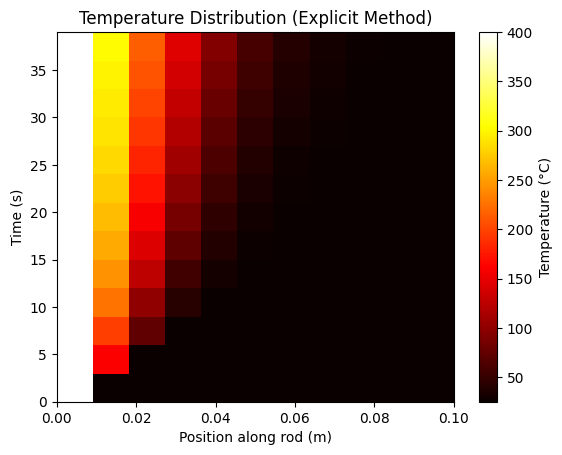

In [13]:
# Explicit method solver
for n in range(num_ts - 1):
    for i in range(1, num_node - 1):
        T_explicit[i, n + 1] = T_explicit[i, n] + r * (T_explicit[i + 1, n] - 2 * T_explicit[i, n] + T_explicit[i - 1, n])

# Plot final temperature distribution
plt.plot(np.linspace(0, L, num_node), T_explicit[:, -1], 'ro--')
plt.xlabel('Position along rod (m)')
plt.ylabel('Temperature (°C)')
plt.title('Final Temperature Distribution (Explicit Method)')
plt.show()

# Visualize the matrix after computation

# We will visualize the temperature distribution after the explicit method has been applied.
# The following will display the final temperature matrix.

# Visualize the matrix
plt.imshow((T_explicit.T), aspect='auto', cmap='hot', origin='lower', extent=[0, L, 0, dt*num_ts])
plt.colorbar(label='Temperature (°C)')
plt.ylabel('Time (s)')
plt.xlabel('Position along rod (m)')
plt.title('Temperature Distribution (Explicit Method)')
plt.show()

## Implicit Formulation
The implicit finite difference scheme for the heat equation is given by:
$$ T_i^{n+1} - r(T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}) = T_i^n $$
The implicit method is based on using the temperatures at the next time step to compute the spatial derivatives, leading to a system of equations that must be solved at each time step. This method is unconditionally stable, meaning it does not have the same restrictions on the time step size as the explicit method.
This is based on the backward difference in time and central difference in space.


```{exercise}
:label: implicit_dirichlet
Implement the implicit finite difference method to solve the 1D transient heat conduction equation with Dirichlet boundary conditions. Consider a rod of length $L$ with the following conditions:
- Initial temperature: $T(x, 0) = T_0$
- Boundary conditions: $T(0, t) = T_{L}$ and $T(L, t) = T_{R}$
```

In [14]:
# Initialize temperature array for implicit method
T_implicit = np.zeros((num_node, num_ts)) # T[i, n] - n is the number of time step, i is the node
# Set initial condition
T_implicit[:, 0] = T_init
# Set boundary conditions
T_implicit[0, :] = T_L
T_implicit[-1, :] = T_R
# Calculate Fourier number
r = alpha * dt / dx**2
print("Fourier number (r):", r)

Fourier number (r): 0.36


In [15]:
A = np.zeros((num_node, num_node)) # Coefficient matrix
b = np.zeros(num_node)              # Right-hand side vector
# Implicit method solver
for n in range(num_ts - 1):
    # Fill the coefficient matrix A
    for i in range(1, num_node - 1):
        A[i, i - 1] = -r
        A[i, i] = 1 + 2 * r
        A[i, i + 1] = -r
    # Apply Dirichlet boundary conditions in matrix A
    A[0, 0] = 1
    A[0, 1] = 0
    A[-1, -1] = 1
    A[-1, -2] = 0
    # Fill the right-hand side vector b
    for i in range(1, num_node - 1):
        b[i] = T_implicit[i, n]
    # Apply Dirichlet boundary conditions in vector b
    b[0] = T_L
    b[-1] = T_R

    # Solve the linear system A * T_new = b
    T_new = np.linalg.solve(A, b)
    # Update the temperature array for the next time step
    T_implicit[:, n + 1] = T_new

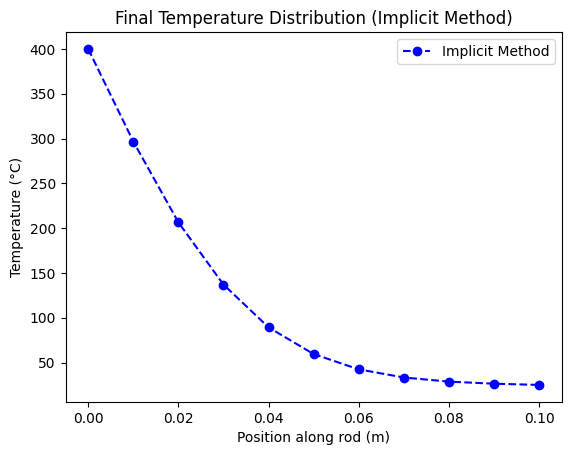

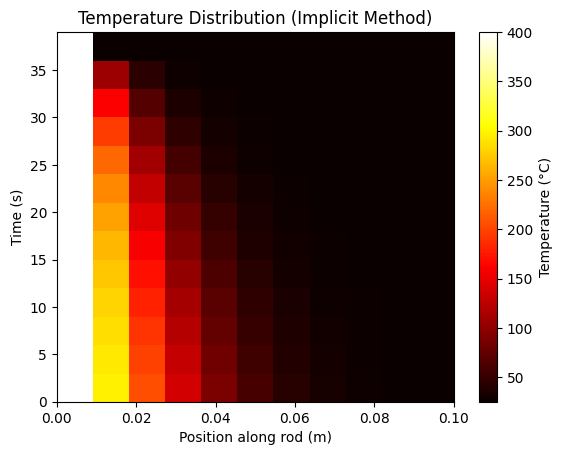

In [16]:
# Plot final temperature distribution for implicit method
plt.plot(np.linspace(0, L, num_node), T_implicit[:, -1],
            'bo--', label='Implicit Method')
plt.xlabel('Position along rod (m)')
plt.ylabel('Temperature (°C)')
plt.title('Final Temperature Distribution (Implicit Method)')
plt.legend()
plt.show()
# Visualize the matrix after computation for implicit method
plt.imshow(np.flipud(T_implicit.T), aspect='auto', cmap='hot', origin
='lower', extent=[0, L, 0, dt*num_ts])
plt.colorbar(label='Temperature (°C)')
plt.ylabel('Time (s)')
plt.xlabel('Position along rod (m)')
plt.title('Temperature Distribution (Implicit Method)')
plt.show()

```{exercise}
:label: compare_explicit_implicit
Compare the results obtained from the explicit and implicit finite difference methods. Plot the temperature distributions from both methods on the same graph for the final time step. Discuss any differences observed in the results and their implications for numerical stability and accuracy.
```

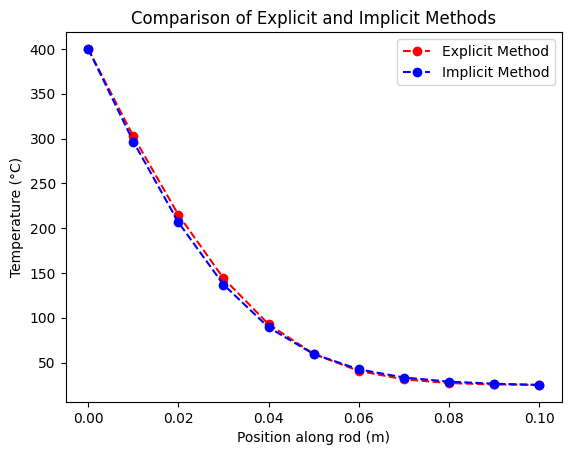

In [17]:
# Compare explicit and implicit methods
plt.plot(np.linspace(0, L, num_node), T_explicit[:, -1],
            'ro--', label='Explicit Method')
plt.plot(np.linspace(0, L, num_node), T_implicit[:, -1],
            'bo--', label='Implicit Method')
plt.xlabel('Position along rod (m)')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Explicit and Implicit Methods')
plt.legend()
plt.show()